In [132]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [133]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [134]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [135]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [136]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [137]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [138]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [139]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [140]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [141]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [142]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [143]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [144]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:10, 11.01it/s]                         


Epoch 1 of 100
Generator loss: 1.66516023, Discriminator loss: 0.86848120


118it [00:10, 11.69it/s]                         


Epoch 2 of 100
Generator loss: 2.60126683, Discriminator loss: 1.44466106


118it [00:09, 12.00it/s]                         


Epoch 3 of 100
Generator loss: 3.92032068, Discriminator loss: 0.63269437


118it [00:09, 11.95it/s]                         


Epoch 4 of 100
Generator loss: 1.49152870, Discriminator loss: 1.32886954


118it [00:10, 11.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


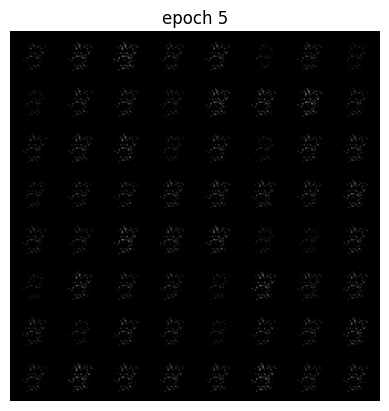

Epoch 5 of 100
Generator loss: 1.92075682, Discriminator loss: 0.99630277


118it [00:09, 11.81it/s]                         


Epoch 6 of 100
Generator loss: 0.82749408, Discriminator loss: 1.42010974


118it [00:09, 11.91it/s]                         


Epoch 7 of 100
Generator loss: 1.48451751, Discriminator loss: 1.07664063


118it [00:09, 11.83it/s]                         


Epoch 8 of 100
Generator loss: 1.24306923, Discriminator loss: 1.18859472


118it [00:09, 11.80it/s]                         


Epoch 9 of 100
Generator loss: 1.42762732, Discriminator loss: 1.14666313


118it [00:10, 11.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


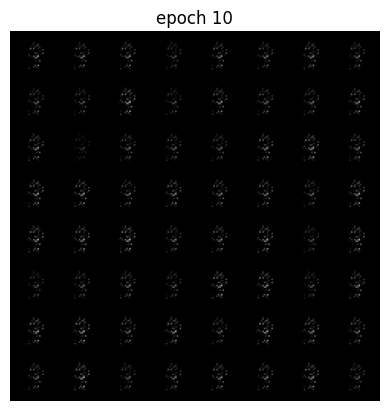

Epoch 10 of 100
Generator loss: 1.86824508, Discriminator loss: 1.21502348


118it [00:10, 11.22it/s]                         


Epoch 11 of 100
Generator loss: 1.26139344, Discriminator loss: 1.28808722


118it [00:09, 11.82it/s]                         


Epoch 12 of 100
Generator loss: 1.39694718, Discriminator loss: 0.91113414


118it [00:10, 11.47it/s]                         


Epoch 13 of 100
Generator loss: 2.34569948, Discriminator loss: 0.97413833


118it [00:10, 11.52it/s]                         


Epoch 14 of 100
Generator loss: 2.89648619, Discriminator loss: 0.82212546


118it [00:09, 11.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


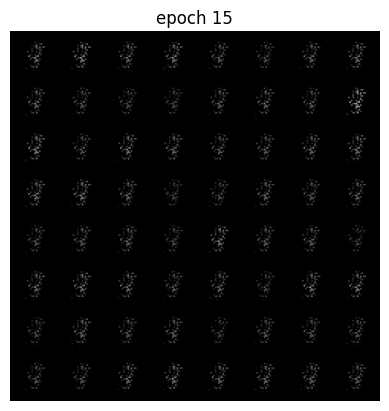

Epoch 15 of 100
Generator loss: 2.40876607, Discriminator loss: 1.00673497


118it [00:10, 11.76it/s]                         


Epoch 16 of 100
Generator loss: 2.96083724, Discriminator loss: 0.73145420


118it [00:10, 10.94it/s]                         


Epoch 17 of 100
Generator loss: 2.29750877, Discriminator loss: 0.72808678


118it [00:10, 11.02it/s]                         


Epoch 18 of 100
Generator loss: 2.58589011, Discriminator loss: 0.74001495


118it [00:10, 10.87it/s]                         


Epoch 19 of 100
Generator loss: 2.55294845, Discriminator loss: 0.75716356


118it [00:10, 10.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


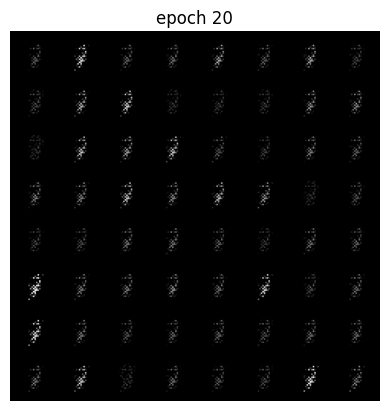

Epoch 20 of 100
Generator loss: 2.46281662, Discriminator loss: 0.86196245


118it [00:10, 10.89it/s]                         


Epoch 21 of 100
Generator loss: 1.89013131, Discriminator loss: 0.81427912


118it [00:11, 10.73it/s]                         


Epoch 22 of 100
Generator loss: 1.53160397, Discriminator loss: 0.96314531


118it [00:11, 10.47it/s]                         


Epoch 23 of 100
Generator loss: 2.03079025, Discriminator loss: 0.68076750


118it [00:11, 10.00it/s]                         


Epoch 24 of 100
Generator loss: 2.26509600, Discriminator loss: 0.64353382


118it [00:11, 10.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


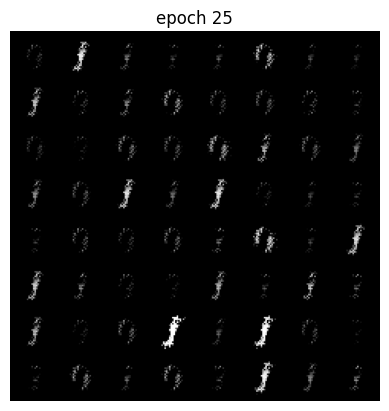

Epoch 25 of 100
Generator loss: 2.42228088, Discriminator loss: 0.53271093


118it [00:10, 11.09it/s]                         


Epoch 26 of 100
Generator loss: 3.10056948, Discriminator loss: 0.43207922


118it [00:10, 10.82it/s]                         


Epoch 27 of 100
Generator loss: 3.16607841, Discriminator loss: 0.43474336


118it [00:11, 10.53it/s]                         


Epoch 28 of 100
Generator loss: 2.91929589, Discriminator loss: 0.55803677


118it [00:10, 11.25it/s]                         


Epoch 29 of 100
Generator loss: 2.62357282, Discriminator loss: 0.49093879


118it [00:10, 11.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


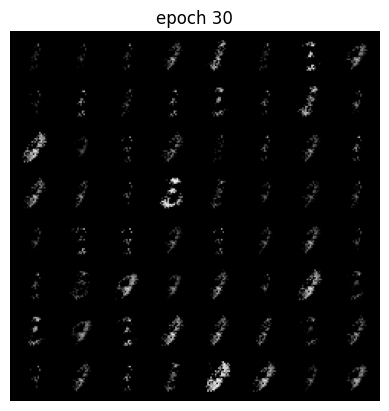

Epoch 30 of 100
Generator loss: 3.26108551, Discriminator loss: 0.43777341


118it [00:10, 11.17it/s]                         


Epoch 31 of 100
Generator loss: 3.08735285, Discriminator loss: 0.45485868


118it [00:10, 11.13it/s]                         


Epoch 32 of 100
Generator loss: 2.94774903, Discriminator loss: 0.38150099


118it [00:10, 11.06it/s]                         


Epoch 33 of 100
Generator loss: 2.83796914, Discriminator loss: 0.48620927


118it [00:10, 11.09it/s]                         


Epoch 34 of 100
Generator loss: 3.07922457, Discriminator loss: 0.51881036


118it [00:10, 11.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


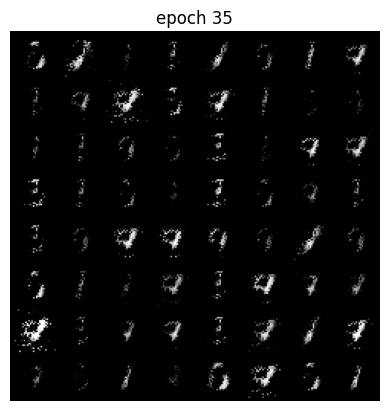

Epoch 35 of 100
Generator loss: 3.22504867, Discriminator loss: 0.40457326


118it [00:10, 11.17it/s]                         


Epoch 36 of 100
Generator loss: 3.33486924, Discriminator loss: 0.44269315


118it [00:10, 10.96it/s]                         


Epoch 37 of 100
Generator loss: 3.10503880, Discriminator loss: 0.49724241


118it [00:10, 11.25it/s]                         


Epoch 38 of 100
Generator loss: 2.93888666, Discriminator loss: 0.47071456


118it [00:10, 11.01it/s]                         


Epoch 39 of 100
Generator loss: 3.05644931, Discriminator loss: 0.44960671


118it [00:10, 11.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


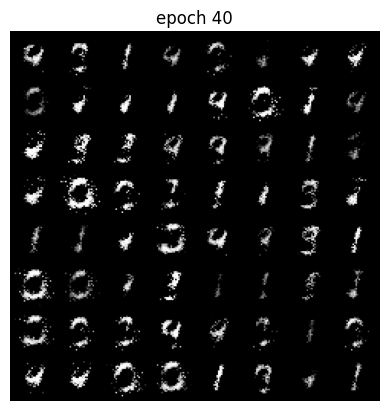

Epoch 40 of 100
Generator loss: 3.46486179, Discriminator loss: 0.42571682


118it [00:10, 11.09it/s]                         


Epoch 41 of 100
Generator loss: 3.26444362, Discriminator loss: 0.50256631


118it [00:10, 11.18it/s]                         


Epoch 42 of 100
Generator loss: 3.31191591, Discriminator loss: 0.43170555


118it [00:10, 11.20it/s]                         


Epoch 43 of 100
Generator loss: 3.00423314, Discriminator loss: 0.47698636


118it [00:10, 11.12it/s]                         


Epoch 44 of 100
Generator loss: 3.01224100, Discriminator loss: 0.58452564


118it [00:10, 10.86it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


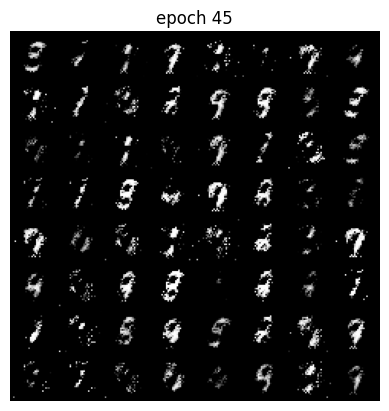

Epoch 45 of 100
Generator loss: 3.06033615, Discriminator loss: 0.45378419


118it [00:10, 11.10it/s]                         


Epoch 46 of 100
Generator loss: 3.29636082, Discriminator loss: 0.47054965


118it [00:10, 10.82it/s]                         


Epoch 47 of 100
Generator loss: 2.94257281, Discriminator loss: 0.47313640


118it [00:10, 10.97it/s]                         


Epoch 48 of 100
Generator loss: 3.08266735, Discriminator loss: 0.50981955


118it [00:10, 10.81it/s]                         


Epoch 49 of 100
Generator loss: 3.19066882, Discriminator loss: 0.44751339


118it [00:11, 10.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


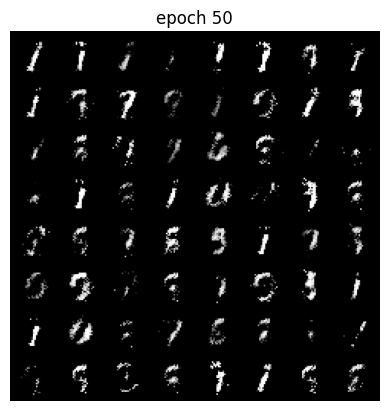

Epoch 50 of 100
Generator loss: 3.19234218, Discriminator loss: 0.45727799


118it [00:10, 10.89it/s]                         


Epoch 51 of 100
Generator loss: 3.24959386, Discriminator loss: 0.48930340


118it [00:11, 10.60it/s]                         


Epoch 52 of 100
Generator loss: 3.17546424, Discriminator loss: 0.55846704


118it [00:10, 10.81it/s]                         


Epoch 53 of 100
Generator loss: 2.83780136, Discriminator loss: 0.49308699


118it [00:11, 10.63it/s]                         


Epoch 54 of 100
Generator loss: 3.00323655, Discriminator loss: 0.49944494


118it [00:11, 10.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


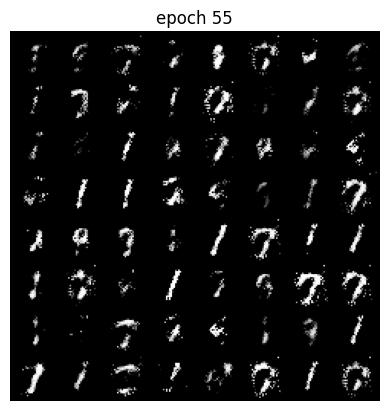

Epoch 55 of 100
Generator loss: 2.80263971, Discriminator loss: 0.57746686


118it [00:10, 11.04it/s]                         


Epoch 56 of 100
Generator loss: 3.00933323, Discriminator loss: 0.54627718


118it [00:10, 11.08it/s]                         


Epoch 57 of 100
Generator loss: 3.04618433, Discriminator loss: 0.48649598


118it [00:10, 11.16it/s]                         


Epoch 58 of 100
Generator loss: 2.92147407, Discriminator loss: 0.47976694


118it [00:10, 10.87it/s]                         


Epoch 59 of 100
Generator loss: 2.70892616, Discriminator loss: 0.59439364


118it [00:10, 11.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


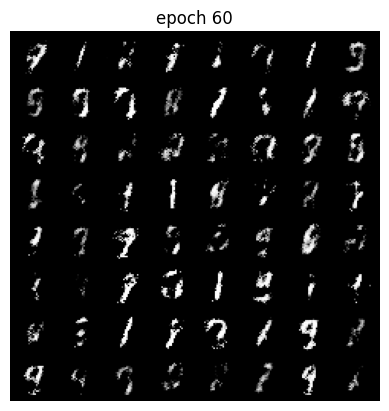

Epoch 60 of 100
Generator loss: 2.68236055, Discriminator loss: 0.58606786


118it [00:10, 11.06it/s]                         


Epoch 61 of 100
Generator loss: 2.70017763, Discriminator loss: 0.55890319


118it [00:10, 11.09it/s]                         


Epoch 62 of 100
Generator loss: 2.98958237, Discriminator loss: 0.48344167


118it [00:10, 10.78it/s]                         


Epoch 63 of 100
Generator loss: 2.78557496, Discriminator loss: 0.58452127


118it [00:10, 11.08it/s]                         


Epoch 64 of 100
Generator loss: 2.58594026, Discriminator loss: 0.64975813


118it [00:10, 10.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


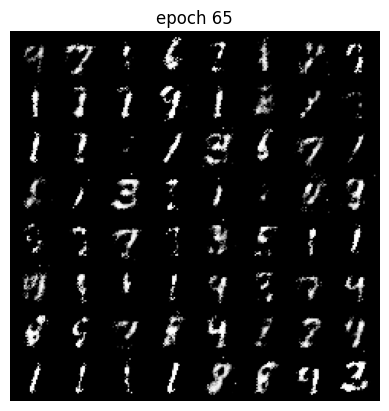

Epoch 65 of 100
Generator loss: 2.83501607, Discriminator loss: 0.51767517


118it [00:10, 10.92it/s]                         


Epoch 66 of 100
Generator loss: 2.76014592, Discriminator loss: 0.57203487


118it [00:10, 10.76it/s]                         


Epoch 67 of 100
Generator loss: 2.64413677, Discriminator loss: 0.55499725


118it [00:10, 11.03it/s]                         


Epoch 68 of 100
Generator loss: 2.66808702, Discriminator loss: 0.56353125


118it [00:10, 11.10it/s]                         


Epoch 69 of 100
Generator loss: 2.76118286, Discriminator loss: 0.55373084


118it [00:10, 11.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


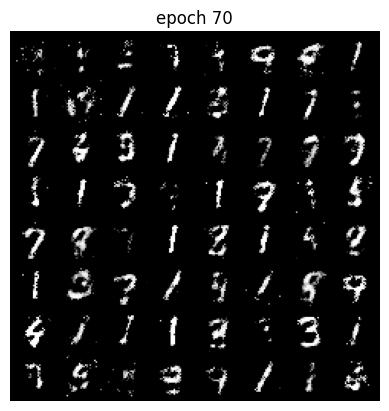

Epoch 70 of 100
Generator loss: 2.77789198, Discriminator loss: 0.56310608


118it [00:10, 10.83it/s]                         


Epoch 71 of 100
Generator loss: 2.87055982, Discriminator loss: 0.52165717


118it [00:10, 10.90it/s]                         


Epoch 72 of 100
Generator loss: 2.62945281, Discriminator loss: 0.55443361


118it [00:10, 10.76it/s]                         


Epoch 73 of 100
Generator loss: 2.78611577, Discriminator loss: 0.51152631


118it [00:10, 10.94it/s]                         


Epoch 74 of 100
Generator loss: 2.90485669, Discriminator loss: 0.53282061


118it [00:10, 10.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


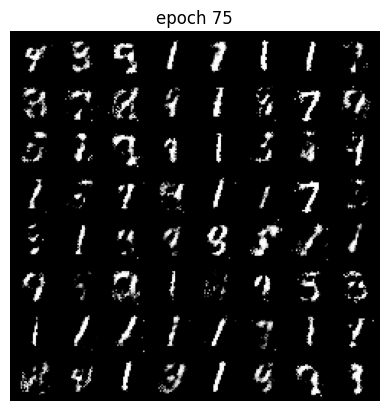

Epoch 75 of 100
Generator loss: 2.71319256, Discriminator loss: 0.54966493


118it [00:10, 10.96it/s]                         


Epoch 76 of 100
Generator loss: 2.53561111, Discriminator loss: 0.56601842


118it [00:10, 10.74it/s]                         


Epoch 77 of 100
Generator loss: 2.66070791, Discriminator loss: 0.57589726


118it [00:11, 10.34it/s]                         


Epoch 78 of 100
Generator loss: 2.43686899, Discriminator loss: 0.57048104


118it [00:11, 10.28it/s]                         


Epoch 79 of 100
Generator loss: 2.62186295, Discriminator loss: 0.56033850


118it [00:11, 10.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


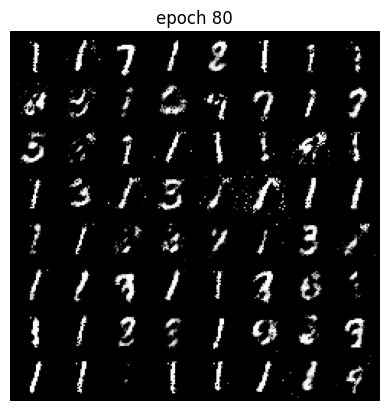

Epoch 80 of 100
Generator loss: 2.79241236, Discriminator loss: 0.55383129


118it [00:11, 10.36it/s]                         


Epoch 81 of 100
Generator loss: 2.65122012, Discriminator loss: 0.54217510


118it [00:11, 10.29it/s]                         


Epoch 82 of 100
Generator loss: 2.52912389, Discriminator loss: 0.56187898


118it [00:11, 10.13it/s]                         


Epoch 83 of 100
Generator loss: 2.72459394, Discriminator loss: 0.52695971


118it [00:12,  9.73it/s]                         


Epoch 84 of 100
Generator loss: 2.57493106, Discriminator loss: 0.57333003


118it [00:11, 10.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


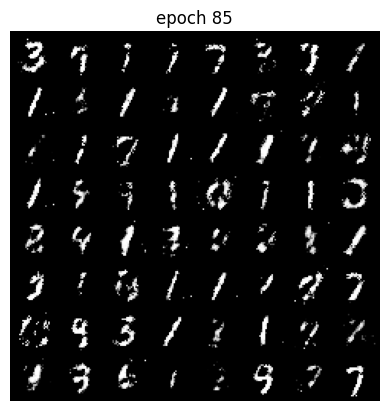

Epoch 85 of 100
Generator loss: 2.62313487, Discriminator loss: 0.58192226


118it [00:11, 10.31it/s]                         


Epoch 86 of 100
Generator loss: 2.48545350, Discriminator loss: 0.61639032


118it [00:11, 10.37it/s]                         


Epoch 87 of 100
Generator loss: 2.49712266, Discriminator loss: 0.58811178


118it [00:11, 10.20it/s]                         


Epoch 88 of 100
Generator loss: 2.50465042, Discriminator loss: 0.58070582


118it [00:10, 10.95it/s]                         


Epoch 89 of 100
Generator loss: 2.47883091, Discriminator loss: 0.58739622


118it [00:10, 10.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


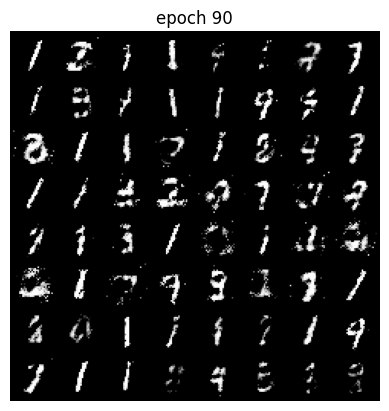

Epoch 90 of 100
Generator loss: 2.49076876, Discriminator loss: 0.58946059


118it [00:11, 10.71it/s]                         


Epoch 91 of 100
Generator loss: 2.55946563, Discriminator loss: 0.59548302


118it [00:11, 10.52it/s]                         


Epoch 92 of 100
Generator loss: 2.44934510, Discriminator loss: 0.59624278


118it [00:11, 10.56it/s]                         


Epoch 93 of 100
Generator loss: 2.41319364, Discriminator loss: 0.61656394


118it [00:11, 10.53it/s]                         


Epoch 94 of 100
Generator loss: 2.50888747, Discriminator loss: 0.61880323


118it [00:10, 10.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


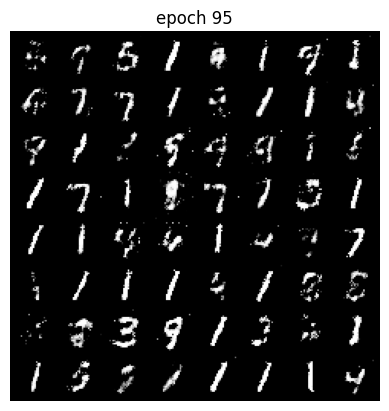

Epoch 95 of 100
Generator loss: 2.52354787, Discriminator loss: 0.64020803


118it [00:10, 10.75it/s]                         


Epoch 96 of 100
Generator loss: 2.42395448, Discriminator loss: 0.60620591


118it [00:11, 10.44it/s]                         


Epoch 97 of 100
Generator loss: 2.28625706, Discriminator loss: 0.64253621


118it [00:13,  8.69it/s]                         


Epoch 98 of 100
Generator loss: 2.39645344, Discriminator loss: 0.60790057


118it [00:13,  8.53it/s]                         


Epoch 99 of 100
Generator loss: 2.33684453, Discriminator loss: 0.64035263


118it [00:14,  8.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


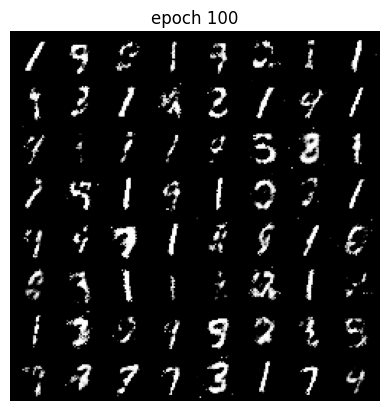

Epoch 100 of 100
Generator loss: 2.48906896, Discriminator loss: 0.60328224


In [145]:
torch.manual_seed(7777)

# Parts A and B. Part c is in gan-modified.ipynb.
part = 'A'

def generator_loss(output, true_label):
    return criterion(output, true_label)
    
# not sure if I'm implementing this in the intended way ...
def discriminator_loss(output, true_label):
    return criterion(output,true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/batch_size)):
        # discriminator on real images
        # log (D(x))
        discriminator.zero_grad()
        real_images = data[0].to(device)
        labels_real = label_real(real_images.size(0))
        output_real = discriminator(real_images)
        loss_real = discriminator_loss(output_real, labels_real)
        
        # discriminator on fake images
        # log(1-D(G(z)))
        noise = create_noise(real_images.size(0), nz)
        fake_images = generator(noise)
        labels_fake = label_fake(fake_images.size(0))
        output_fake = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(output_fake, labels_fake)
        
        # train discriminator
        d_loss = loss_real + loss_fake
        d_loss.backward()
        optim_d.step()
        
        # train generator
        for step in range(k):
            generator.zero_grad()
            noise = create_noise(sample_size, nz)
            fake_images = generator(noise)
            output = discriminator(fake_images)
            # Part A: log(D(G(z)))
            if (part == 'A'):
                labels = label_real(sample_size)
                g_loss = generator_loss(output, labels)
            # Part B: log(1-D(G(z)))
            elif (part == 'B'):
                labels = label_fake(sample_size)
                g_loss = -generator_loss(output, labels)

            g_loss.backward()
            optim_g.step()
        
        loss_g += g_loss.item()
        loss_d += d_loss.item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [146]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [147]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

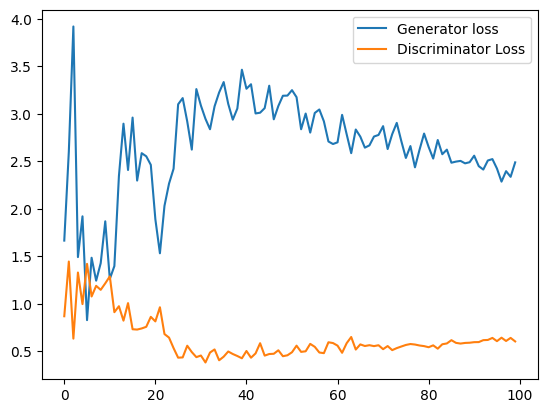

In [148]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')